In [38]:
import json

with open('/data3/KJE/code/WIL_DeepLearningProject_2/NS_Parser/SITUM_EMNLP/outputs/Ours_GPT4o-mini_extract_logiqa_test_gpt-3.5-turbo_Direct.json', 'r') as f :
    data = json.load(f) 

with open('/data3/KJE/code/WIL_DeepLearningProject_2/NS_Parser/SITUM_EMNLP/outputs/Ours_CoT_logiqa_test_gpt-3.5-turbo_missing.json', 'r') as f :
    data2 = json.load(f) 

In [39]:
len(data), len(data2)

(3239, 10)

In [3]:
data[0].keys()

dict_keys(['id', 'questtion', 'original_context', 'reading', 'reasoning', 'predicted_answer', 'answer', 'predicted_choice', 'time_cost'])

In [21]:
print(data[2]['original_context'])
print(data[2]['questtion'])
print(data[2]['answer'])
print(data[2]['reading'])
print("====")
print(data[2]['reasoning'])


Many people who call themselves teachers are not actually teachers, because teaching is not their main source of income.
The conclusion that low income prevents teachers from being dedicated to their work is assumed by the above discussion.
not-entailment
Let's analyze the given problem step by step.

1. **Many people who call themselves teachers are not actually teachers.**
   - Time: ['none']
   - Space: ['none']
   - Causality: ['many people call themselves teachers', 'are not actually teachers']
   - Intention: ['none']
   - Protagonist: ['many people', 'teachers']

2. **Because teaching is not their main source of income.**
   - Time: ['none']
   - Space: ['none']
   - Causality: ['teaching is not their main source of income', 'many people who call themselves teachers are not actually teachers']
   - Intention: ['to explain why many people who call themselves teachers are not actually teachers']
   - Protagonist: ['teaching', 'many people']

Combining these, we have:

1. Many peop

In [42]:
correct = 0

fail_case =[]
for d in data:
    if d['answer'] == 'entailment':
        gt = 'true'
    else:
        gt = 'false'

    if gt in d['predicted_answer'].lower():
        correct += 1 
    else:
        fail_case.append(d)

# for d in data2:
#     if d['answer'] == 'entailment':
#         gt = 'a'
#     else:
#         gt = 'b'

#     if gt in d['predicted_answer'].lower():
#         correct += 1 
#     else:
#         fail_case.append(d)

# print(correct/(len(data)+len(data2)))
# # print(correct/(len(data)))
# print(correct)
print(correct/len(data))


0.5480086446434085


In [230]:
len(fail_case)

1351

In [4]:
correct = 0

fail_case =[]
for d in data:
    if d['answer'] == 'entailment':
        gt = 'a'
    else:
        gt = 'b'

    if gt in d['predicted_answer'].lower():
        correct += 1 
    else:
        fail_case.append(d)

print(correct/(len(data)))

0.6481366459627329


In [13]:
import json 
with open('/data3/KJE/code/WIL_DeepLearningProject_2/NS_Parser/data/FOLIO/dev.json', 'r') as f :
    folio = json.load(f)

len(folio)

204

In [34]:
import json 
with open('/data3/KJE/code/WIL_DeepLearningProject_2/NS_Parser/data/ProofWriter/ours_dev.json', 'r') as f :
    ours = json.load(f)

len(ours)

600

In [35]:
ours[0]['context']

'Bob is cold. Bob is quiet. Bob is red. Bob is smart. Charlie is kind. Charlie is quiet. Charlie is red. Charlie is rough. Dave is cold. Dave is kind. Dave is smart. Fiona is quiet. If something is quiet and cold then it is smart. Red, cold things are round. If something is kind and rough then it is red. All quiet things are rough. Cold, smart things are red. If something is rough then it is cold. All red things are rough. If Dave is smart and Dave is kind then Dave is quiet.protagonist is fiona\nprotagonist is dave\nprotagonist is bob\nprotagonist is charlie'

In [8]:
folio[0]['context']

'If people perform in school talent shows often, then they attend and are very engaged with school events. People either perform in school talent shows often or are inactive and disinterested members of their community. If people chaperone high school dances, then they are not students who attend the school. All people who are inactive and disinterested members of their community chaperone high school dances. All young children and teenagers who wish to further their academic careers and educational opportunities are students who attend the school. Bonnie either both attends and is very engaged with school events and is a student who attends the school, or she neither attends and is very engaged with school events nor is a student who attends the school.'

In [31]:
with open('/data3/KJE/code/WIL_DeepLearningProject_2/NS_Parser/SITUM_EMNLP/outputs/Ours_CoT_logiqa_test_gpt-3.5-turbo.json', 'r') as f :
    data = json.load(f)

len(data)

3230

In [44]:
answer_path = "/data3/KJE/code/WIL_DeepLearningProject_2/NS_Parser/SITUM_EMNLP/data/LogiQA2.0/logiqa2nli/DATA/QA2NLI/test_new2.json"
with open(answer_path, 'r') as f :
    answer_file = json.load(f)

len(answer_file)

3240

In [30]:
with open('/data3/KJE/code/WIL_DeepLearningProject_2/NS_Parser/EMNLP_exp/Logic-LLM_reasong/results/Direct_FOLIO_none_ours_dev_non_zero_gpt-4o-mini.json', 'r') as f :
    data = json.load(f)

len(data)

204

In [31]:
data[0]

{'id': 'FOLIO_dev_0',
 'context': "If people perform in school talent shows often, then they attend and are very engaged with school events. People either perform in school talent shows often or are inactive and disinterested members of their community. If people chaperone high school dances, then they are not students who attend the school. All people who are inactive and disinterested members of their community chaperone high school dances. All young children and teenagers who wish to further their academic careers and educational opportunities are students who attend the school. Bonnie either both attends and is very engaged with school events and is a student who attends the school, or she neither attends and is very engaged with school events nor is a student who attends the school.time is high school dances.\nlocation is school talent shows\nlocation is high school\nlocation is school\nprotagonist is people who chaperone high school dances.\nprotagonist is inactive and disinteres

In [32]:
cnt = 0
fail_list = []
for d in data:
    answer = d['answer'].lower()
    if answer in d['parsed'].lower():
        # print(answer)
        # print( d['parsed'].lower())
        cnt+=1 
    else:
        fail_list.append(d)

print(cnt)
print(cnt/len(data))

126
0.6176470588235294


In [ ]:
fail_list

In [45]:
from collections import Counter, defaultdict

# 1) ans, pred 각각에서 id별 개수 세기
ans_id_counts  = Counter(item['id'] for item in answer_file)
pred_id_counts = Counter(item['id'] for item in data)

# 2) ans 기준으로 pred와 개수가 다른 id 찾기
mismatch_ids = [
    _id for _id, cnt in ans_id_counts.items()
    if pred_id_counts.get(_id, 0) != cnt
]

# 3) 그 id들에 대해 hypothesis가 다른 샘플만 추리기
diff_samples = []
for _id in mismatch_ids:
    # ans, pred에서 해당 id의 모든 hypothesis 수집
    ans_hyps  = [item['hypothesis'] for item in answer_file if item['id'] == _id]
    pred_hyps = [item['questtion'] for item in data        if item['id'] == _id]
    
    # 서로 짝지어서, 값이 다르면 diff_samples에 추가
    for ah in ans_hyps:
        for ph in pred_hyps:
            if ah != ph:
                diff_samples.append({
                    'id':              _id,
                    'ans_hypothesis':  ah,
                    'pred_hypothesis': ph
                })

# 결과 예시 출력
print(f"총 {len(mismatch_ids)}개의 ID에서 개수 불일치 발생")
print(f"그 중 hypothesis가 다른 샘플: {len(diff_samples)}개")
# diff_samples 리스트를 살펴보시면 됩니다.

# 1) pred 데이터에서 (id, hypothesis) 쌍을 집합으로 생성
pred_set = {(item['id'], item['questtion']) for item in data}

# 2) answer_file에서 pred_set에 없는 항목만 필터링
missing_answers = [
    ans for ans in answer_file
    if (ans['id'], ans['hypothesis']) not in pred_set
]

print(f"pred에 없는 answer 샘플: {len(missing_answers)}개")

missing_data_save_path = "/data3/KJE/code/WIL_DeepLearningProject_2/NS_Parser/SITUM_EMNLP/data/LogiQA2.0/logiqa2nli/DATA/QA2NLI/missing_samples.json"
with open(missing_data_save_path, 'w') as f:
    json.dump(missing_answers, f, ensure_ascii=False)


총 1개의 ID에서 개수 불일치 발생
그 중 hypothesis가 다른 샘플: 1개
pred에 없는 answer 샘플: 1개


In [113]:
from datasets import load_dataset

ds = load_dataset("tasksource/logiqa-2.0-nli")

In [158]:
for d in ds['test']:
    if d['id'] ==14772:
        print(d)

{'id': 14772, 'premise': "Naturalist: Different nonhuman primate species exhibit many contrasts in behavior. If a zookeeper leaves a screwdriver within reach of a chimpanzee, the animal is likely to examine and play with it for a time, and then move on to something else. In the same circumstances, an orangutan is likely to pretend to ignore the tool at first; later, in the zookeeper ' s absence, the orangutan may use the screwdriver to try to dismantle its cage.", 'hypothesis': "Not all nonhuman primates understand tool use is most strongly supported by the naturalist's statements.", 'label': 'not-entailment'}
{'id': 14772, 'premise': "Naturalist: Different nonhuman primate species exhibit many contrasts in behavior. If a zookeeper leaves a screwdriver within reach of a chimpanzee, the animal is likely to examine and play with it for a time, and then move on to something else. In the same circumstances, an orangutan is likely to pretend to ignore the tool at first; later, in the zookee

In [153]:
answer_file[0].keys()

dict_keys(['id', 'premise', 'hypothesis', 'label', 'type'])

In [154]:
hg_answer = []
for d in ds['test']:
    hg_id = d['id']
    hg_hyp = d['hypothesis']
    hg_answer.append((hg_id, hg_hyp))

git_answer = []
for d in answer_file:
    git_id = d['id']
    git_hyp = d['hypothesis']
    git_answer.append((git_id, git_hyp))

In [157]:
len(sgit_answer), len(git_answer)

(3173, 3240)

In [20]:
with open("/data3/KJE/code/WIL_DeepLearningProject_2/NS_Parser/EMNLP_exp/analy_cont/CoT_LogiQA2_test_gpt-3.5-turbo.json", "r") as F:
    results_cot = json.load(F)

In [21]:
len(results_cot)

3240

In [22]:
with open("/data3/KJE/code/WIL_DeepLearningProject_2/NS_Parser/EMNLP_exp/analy_cont/Direct_LogiQA2_test_gpt-3.5-turbo.json", "r") as F:
    results_direct = json.load(F)

In [23]:
results_cot[0]['answer']

'A'

In [30]:
cot_correct = 0

cot_fail_case =[]
for d in results_cot:
    if d['answer'] == 'A':
        gt = 'a'
    else:
        gt = 'b'

    if gt in d['parsed'].lower():
        cot_correct += 1 
    else:
        cot_fail_case.append(d)

print(cot_correct/(len(data)+len(data2)))
# print(correct/(len(data)))
print(cot_correct)
print(len(results_cot))
print(len(cot_fail_case))

0.562037037037037
1821
3240
1419


In [274]:
results_direct[0]['answer']

'A'

In [32]:
direct_correct = 0

direct_fail_case =[]
for d in results_direct:
    if d['answer'] == 'A':
        gt = 'a'
    else:
        gt = 'b'

    if gt in d['parsed'].lower():
        direct_correct += 1 
    else:
        direct_fail_case.append(d)

print(direct_correct/(len(data)+len(data2)))
# print(correct/(len(data)))
print(direct_correct)
print(len(results_direct))
print(len(direct_fail_case))

0.5049382716049383
1636
3240
1604


In [105]:
len(results_cot),len(answer_file)

(3238, 3240)

In [126]:
results_cot[0].keys()

dict_keys(['id', 'question', 'answer', 'context', 'reading', 'last_out', 'predicted_reasoning', 'predicted_answer', 'time_cost', 'parsed', 'is_correct', 'hit', 'is_best', 'ratio'])

In [140]:
results_cot[0]['question'], data_all[0]['questtion']

("Entailment or not-entailment between the context above and the following hypothesis?\n\nAssuming that three of the four sentences the teacher said are true and one is false, the correct option is 'Left hand fruit candy, right hand toffee'.",
 "Assuming that three of the four sentences the teacher said are true and one is false, the correct option is 'Left hand fruit candy, right hand toffee'.")

In [24]:
data_all = data+data2

In [33]:
from tqdm import tqdm
our_win_cot =[]
our_win_our =[]


for d in tqdm(data_all):
    id = d['id']
    for cot in results_cot:
        cot_id = int(cot['id'].split('LogiQA_2_test_')[1].split('_')[0])

        if id == cot_id:
            # print(f"[Ours]: {d['questtion']}")
            # ccc = cot['question'].split('Entailment or not-entailment between the context above and the following hypothesis?\n\n')[1]
            # print(f"[CoT]: {ccc}")
            # print()
            if d['questtion'] in cot['question']:
                ans = d['answer']
                our_pre = d['predicted_answer'].lower()
                cot_pre = cot['parsed'].lower()
                # print(our_pre,cot_pre)

                if ans == 'entailment':
                    gt ='a'
                else:
                    gt='b'
                
                if gt in our_pre and gt not in cot_pre:
                    our_win_our.append(d)
                    our_win_cot.append(cot)
        

NameError: name 'data_all' is not defined

In [160]:
our_win_all =[]
our_win_d =[]

for d in our_win_our:
    id = d['id']
    for cot in results_direct:
        cot_id = int(cot['id'].split('LogiQA_2_test_')[1].split('_')[0])

        if id == cot_id:
            # print(f"[Ours]: {d['questtion']}")
            # ccc = cot['question'].split('Entailment or not-entailment between the context above and the following hypothesis?\n\n')[1]
            # print(f"[CoT]: {ccc}")
            # print()
            if d['questtion'] in cot['question']:
                ans = d['answer']
                our_pre = d['predicted_answer'].lower()
                cot_pre = cot['parsed'].lower()
                # print(our_pre,cot_pre)

                if ans == 'entailment':
                    gt ='a'
                else:
                    gt='b'
                
                if gt in our_pre and gt not in cot_pre:
                    our_win_all.append(d)
                    our_win_d.append(cot)
    

In [161]:
len(our_win_cot),len(our_win_all)

(521, 298)

In [189]:
len(our_win_our[0]['reasoning'])

19

In [ ]:
real_reasoning_ours = []
real_reasoning_ours_indices = []
for idx, o in enumerate(our_win_our):
    # if len(o['reasoning']) > 19 and not o['reasoning'].startswith("**Final Answer"): real_reasoning_ours.append(o)
    if len(o['reasoning']) > 19: 
        real_reasoning_ours.append(o)
        real_reasoning_ours_indices.append(idx)
    
len(real_reasoning_ours)

In [72]:
import os

our_win_our_reasoing = []
our_win_cot_reasoing = []
for idx in real_reasoning_ours_indices:
    our_win_our_reasoing.append(our_win_our[idx])
    our_win_cot_reasoing.append(our_win_cot[idx])

base_path = "/data3/KJE/code/WIL_DeepLearningProject_2/NS_Parser/SITUM_EMNLP/outputs"
ours_path = "ours_win_ours.json"
cot_path = "our_win_cot.json"
with open(os.path.join(base_path, ours_path), 'w') as f:
    json.dump(our_win_our_reasoing, f, indent=4, ensure_ascii=False)

with open(os.path.join(base_path, cot_path), 'w') as f:
    json.dump(our_win_cot_reasoing, f, indent=4, ensure_ascii=False)

NameError: name 'real_reasoning_ours_indices' is not defined

In [389]:
idx=2
our_win_our_reasoing[idx]

{'id': 671,
 'questtion': 'Organize some employees to travel abroad before the Spring Festival is not unpaid prompting.',
 'original_context': 'Unpaid prompting: non economic remuneration refers to the remuneration received by employees from their own work. Employees are praised, promoted and valued for their hard work, resulting in a sense of work honor, achievement and responsibility, as well as social respect and career development opportunities',
 'reading': "Let's read step by step. \n\nUnpaid prompting: non-economic remuneration refers to the remuneration received by employees from their own work. {time: ['none'], space:['none'], causality: ['none'], intention:['none'], protagonist: ['employees']}\n\nEmployees are praised, promoted, and valued for their hard work, resulting in a sense of work honor, achievement, and responsibility, as well as social respect and career development opportunities. {time: ['none'], space:['none'], causality: ['employees are praised, promoted, and val

In [390]:
our_win_cot_reasoing[idx]

{'id': 'LogiQA_2_test_671_88',
 'question': 'Entailment or not-entailment between the context above and the following hypothesis?\n\nOrganize some employees to travel abroad before the Spring Festival is not unpaid prompting.',
 'answer': 'A',
 'context': 'Unpaid prompting: non economic remuneration refers to the remuneration received by employees from their own work. Employees are praised, promoted and valued for their hard work, resulting in a sense of work honor, achievement and responsibility, as well as social respect and career development opportunities',
 'reading': '',
 'last_out': '1. The context discusses non-economic remuneration received by employees for their hard work, such as praise, promotion, and career development opportunities.\n2. The hypothesis states that organizing some employees to travel abroad before the Spring Festival is not unpaid prompting.\n3. Traveling abroad before the Spring Festival is a form of remuneration that is not mentioned in the context.\n4. T

In [212]:
import random
print(our_win_our[123]['reading'])

Let's read step by step.

If the public policy of a certain place is formulated correctly and implemented effectively, there will be no large-scale petitions. {time: ['none'], space:['certain place'], causality: ['none'], intention:['none'], protagonist: ['public policy', 'large-scale petitions']}

Only when the relevant decision-makers do not care about the masses will large-scale petitions occur. {time: ['none'], space:['none'], causality: ['public policy is formulated correctly and implemented effectively -> no large-scale petitions', 'decision-makers do not care about masses -> large-scale petitions occur'], intention:['none'], protagonist: ['decision-makers', 'masses', 'large-scale petitions']}

The public policy formulation of a certain place is correct, and the relevant decision-makers are also concerned. {time: ['none'], space:['certain place'], causality: ['public policy is formulated correctly', 'decision-makers are concerned'], intention:['none'], protagonist: ['public polic

In [187]:
print(our_win_cot[123]['predicted_reasoning'])

1. The context states that if the public policy is formulated correctly and implemented effectively, there will be no large-scale petitions.
2. It also mentions that large-scale petitions occur only when decision-makers do not care about the masses.
3. The context further states that the public policy formulation is correct in a certain place, and the decision-makers are concerned.
4. Additionally, it mentions that the local masses are satisfied with the policy after relying on them and conducting in-depth investigations.

Given the above information, we can conclude that if there are no large-scale petitions in a certain place, it implies that the public policy is formulated correctly and effectively, and the decision-makers care about the masses. Therefore, the hypothesis that "If there is no large-scale petition in a certain place, then the public policy of that place is formulated correctly" is entailed by the context.

**Final Answer: A (Entailment)**


In [215]:
data_all[0]

{'id': 7609,
 'questtion': "Assuming that three of the four sentences the teacher said are true and one is false, the correct option is 'Left hand fruit candy, right hand toffee'.",
 'original_context': 'There are two kinds of fruit candy and toffee in the jar.The kindergarten teacher put his hands into the jar, and then clenched his fists to take out a piece of candies. Then the teacher said four things: 1. The right hand is definitely not fruit candy. 2. Or the left hand is fruit candies, or fruit candies on the right hand. 3. If the left hand is fruit candies, then the right hand is not fruit candies. 4. Both the left hand and the right hand are fruit candies.',
 'reading': "Let's read step by step.\n\nThere are two kinds of fruit candy and toffee in the jar. {time: ['none'], space:['jar'], causality: ['none'], intention:['none'], protagonist: ['none']}\n\nThe kindergarten teacher put his hands into the jar, and then clenched his fists to take out a piece of candies. {time: ['none']

In [216]:
answer_file[0]

{'id': 7609,
 'premise': 'There are two kinds of fruit candy and toffee in the jar.The kindergarten teacher put his hands into the jar, and then clenched his fists to take out a piece of candies. Then the teacher said four things: 1. The right hand is definitely not fruit candy. 2. Or the left hand is fruit candies, or fruit candies on the right hand. 3. If the left hand is fruit candies, then the right hand is not fruit candies. 4. Both the left hand and the right hand are fruit candies.',
 'hypothesis': "Assuming that three of the four sentences the teacher said are true and one is false, the correct option is 'Left hand fruit candy, right hand toffee'.",
 'label': 'entailment',
 'type': {'Sufficient Conditional Reasoning': True,
  'Disjunctive Reasoning': True,
  'Conjunctive Reasoning': True}}

fail_case

In [47]:
from tqdm import tqdm
our_failcase_answer = []
for d in tqdm(fail_case):
    id = d['id']
    for ans in answer_file:
        cot_id = ans['id']
        if id == cot_id and d['questtion'] == ans['hypothesis']:
            our_failcase_answer.append(ans)
            break

100%|██████████| 1464/1464 [00:00<00:00, 4655.30it/s]


In [37]:
cot_fail_case[0].keys()

dict_keys(['id', 'question', 'answer', 'context', 'reading', 'last_out', 'predicted_reasoning', 'predicted_answer', 'time_cost', 'parsed', 'is_correct', 'hit', 'is_best', 'acc_acc'])

In [31]:
cot_failcase_answer = []
for d in tqdm(cot_fail_case):
    id = int(d['id'].split('LogiQA_2_test_')[1].split('_')[0])
    for ans in answer_file:
        cot_id = ans['id']
        if id == cot_id and d['question'].split('Entailment or not-entailment between the context above and the following hypothesis?\n\n')[1] == ans['hypothesis']:
            cot_failcase_answer.append(ans)
            break

100%|█████████▉| 1418/1419 [00:00<00:00, 3303.62it/s]


IndexError: list index out of range

In [33]:
direct_failcase_answer = []
for d in tqdm(direct_fail_case):
    id = int(d['id'].split('LogiQA_2_test_')[1].split('_')[0])
    for ans in answer_file:
        cot_id = ans['id']
        if id == cot_id and d['question'].split('Entailment or not-entailment between the context above and the following hypothesis?\n\n')[1] == ans['hypothesis']:
            direct_failcase_answer.append(ans)
            break

100%|█████████▉| 1603/1604 [00:00<00:00, 3533.04it/s]


IndexError: list index out of range

In [286]:
cot_failcase_answer[0]

{'id': 8443,
 'premise': 'Social phobia is an important subtype of anxiety disorder, its main symptom is the fear of being watched, such as fear of speaking in public, and even afraid to go out when the symptoms are serious. Shyness is a common personality trait, which is not pathological in itself. However, the vast majority of patients with social phobia will be significantly relieved after treatment, and psychotherapy should be the first choice for patients with mild symptoms; if patients are unable or unwilling to receive psychotherapy because of busy work and other reasons, drug treatment can be the first choice, but the combination of drug therapy and psychotherapy is the most effective way to treat social phobia. In addition, most people with social phobias start in adolescence, so prevention is very important.',
 'hypothesis': 'Combination therapy is the most effective in patients with mild symptoms is true according to the passage.',
 'label': 'entailment',
 'type': {'Categori

In [10]:
from collections import Counter

In [48]:
counter = Counter()
for item in our_failcase_answer:
    for t, val in item['type'].items():
        if val:
            counter[t] += 1

# 그래프 데이터 준비
labels = list(counter.keys())
counts = [counter[label] for label in labels]

In [49]:
total_counter = Counter()
for item in answer_file:
    for t, val in item['type'].items():
        if val:
            total_counter[t] += 1

# 그래프 데이터 준비
labels = list(total_counter.keys())
total_counts = [total_counter[label] for label in labels]

In [50]:
total_counter

Counter({'Sufficient Conditional Reasoning': 3072,
         'Conjunctive Reasoning': 2755,
         'Categorical Reasoning': 1945,
         'Necessry Condtional Reasoning': 1301,
         'Disjunctive Reasoning': 875})

In [52]:
tsu=total_counter['Sufficient Conditional Reasoning']
tcon=total_counter['Conjunctive Reasoning']
tca=total_counter['Categorical Reasoning']
tnc=total_counter['Necessry Condtional Reasoning']
tdis=total_counter['Disjunctive Reasoning']

In [34]:
cot_counter = Counter()
for item in cot_failcase_answer:
    for t, val in item['type'].items():
        if val:
            cot_counter[t] += 1

# 그래프 데이터 준비
labels = list(cot_counter.keys())
cot_counts = [cot_counter[label] for label in labels]

In [79]:
cot_counter

Counter({'Sufficient Conditional Reasoning': 1354,
         'Conjunctive Reasoning': 1202,
         'Categorical Reasoning': 844,
         'Necessry Condtional Reasoning': 572,
         'Disjunctive Reasoning': 373})

In [35]:
direct_counter = Counter()
for item in direct_failcase_answer:
    for t, val in item['type'].items():
        if val:
            direct_counter[t] += 1

# 그래프 데이터 준비
labels = list(direct_counter.keys())
direct_counts = [direct_counter[label] for label in labels]

In [80]:
direct_counter

Counter({'Sufficient Conditional Reasoning': 1520,
         'Conjunctive Reasoning': 1364,
         'Categorical Reasoning': 966,
         'Necessry Condtional Reasoning': 641,
         'Disjunctive Reasoning': 429})

In [83]:
print(1-direct_counter['Categorical Reasoning']/tca)
print(1-direct_counter['Conjunctive Reasoning']/tcon)
print(1-direct_counter['Disjunctive Reasoning']/tdis)
print(1-direct_counter['Necessry Condtional Reasoning']/tnc)
print(1-direct_counter['Sufficient Conditional Reasoning']/tsu)




0.5033419023136247
0.5049001814882033
0.5097142857142858
0.5073020753266717
0.5052083333333333


In [50]:
cot_counter

Counter({'Sufficient Conditional Reasoning': 1354,
         'Conjunctive Reasoning': 1202,
         'Categorical Reasoning': 844,
         'Necessry Condtional Reasoning': 572,
         'Disjunctive Reasoning': 373})

In [84]:
print(1-cot_counter['Categorical Reasoning']/tca)
print(1-cot_counter['Conjunctive Reasoning']/tcon)
print(1-cot_counter['Disjunctive Reasoning']/tdis)
print(1-cot_counter['Necessry Condtional Reasoning']/tnc)
print(1-cot_counter['Sufficient Conditional Reasoning']/tsu)



0.5660668380462726
0.5637023593466425
0.5737142857142857
0.5603382013835512
0.5592447916666667


In [51]:
counter

Counter({'Sufficient Conditional Reasoning': 1286,
         'Conjunctive Reasoning': 1133,
         'Categorical Reasoning': 812,
         'Necessry Condtional Reasoning': 561,
         'Disjunctive Reasoning': 368})

In [53]:
print(1-counter['Categorical Reasoning']/tca)
print(1-counter['Conjunctive Reasoning']/tcon)
print(1-counter['Disjunctive Reasoning']/tdis)
print(1-counter['Necessry Condtional Reasoning']/tnc)
print(1-counter['Sufficient Conditional Reasoning']/tsu)


0.5460154241645244
0.5502722323049002
0.5485714285714286
0.5342044581091467
0.5462239583333333


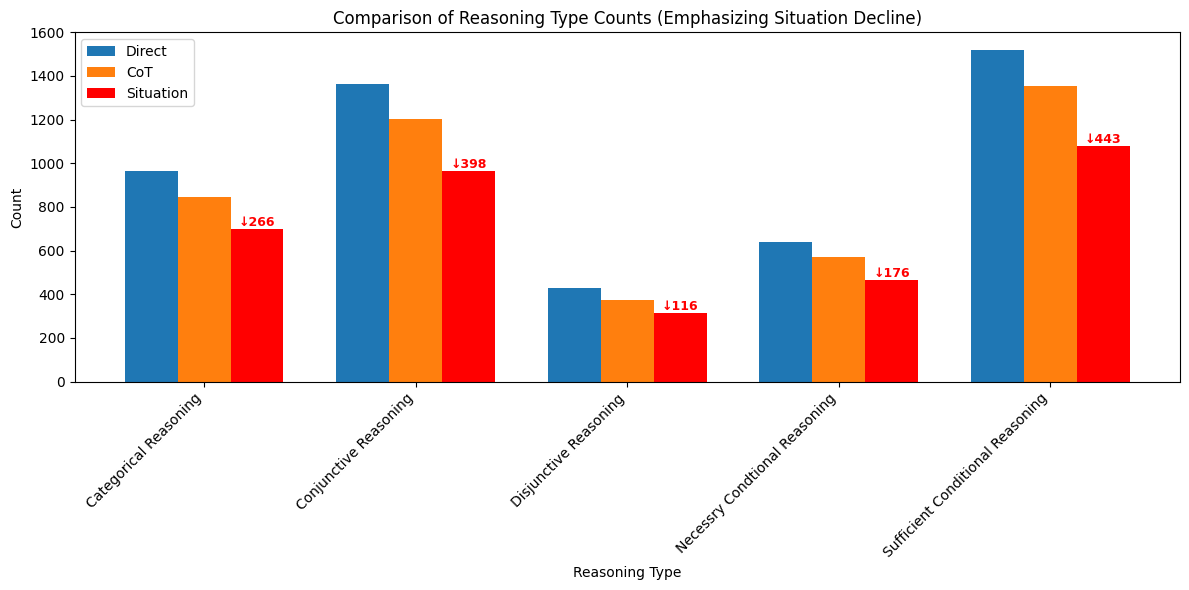

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# 모든 레이블 수집
labels = sorted(set(direct_counter.keys()) | set(cot_counter.keys()) | set(counter.keys()))

# 값 추출
direct_counts_plot    = [direct_counter.get(label, 0) for label in labels]
cot_counts_plot       = [cot_counter.get(label, 0) for label in labels]
situation_counts_plot = [counter.get(label, 0) for label in labels]

# 막대 위치
x = np.arange(len(labels))
width = 0.25

# 막대 색상 지정: 감소한 경우 강조색 사용
situation_colors = []
for i, label in enumerate(labels):
    max_other = max(direct_counts_plot[i], cot_counts_plot[i])
    if counter.get(label, 0) < max_other:
        situation_colors.append('red')  # 감소한 경우 강조 색
    else:
        situation_colors.append('gray')  # 그렇지 않은 경우 중립 색

# 플롯
plt.figure(figsize=(12, 6))
plt.bar(x - width, direct_counts_plot, width, label='Direct')
plt.bar(x,         cot_counts_plot,    width, label='CoT')
bars = plt.bar(x + width, situation_counts_plot, width, label='Situation', color=situation_colors)

# 감소한 부분에 텍스트로 감소량 표시
for i, bar in enumerate(bars):
    situation_val = situation_counts_plot[i]
    max_other = max(direct_counts_plot[i], cot_counts_plot[i])
    if situation_val < max_other:
        diff = max_other - situation_val
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'↓{diff}', 
                 ha='center', va='bottom', color='red', fontsize=9, fontweight='bold')

# 스타일 설정
plt.ylim(0, 1600)
plt.xlabel('Reasoning Type')
plt.ylabel('Count')
plt.title('Comparison of Reasoning Type Counts (Emphasizing Situation Decline)')
plt.xticks(x, labels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

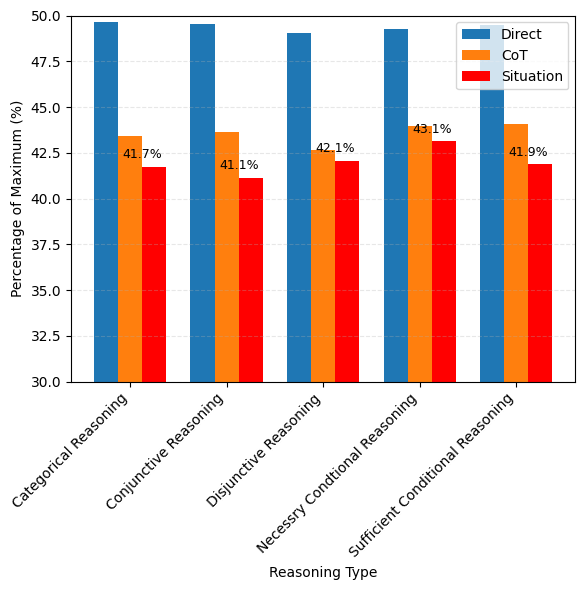

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 최대값 사전 (label: 최대값)
max_values = {
    'Sufficient Conditional Reasoning': 3072,
    'Conjunctive Reasoning': 2755,
    'Categorical Reasoning': 1945,
    'Necessry Condtional Reasoning': 1301,
    'Disjunctive Reasoning': 875
}

# 모든 레이블 수집
labels = sorted(set(direct_counter.keys()) | set(cot_counter.keys()) | set(counter.keys()))

# %로 변환된 값 추출
direct_percents    = [direct_counter.get(label, 0)    / max_values[label] * 100 for label in labels]
cot_percents       = [cot_counter.get(label, 0)       / max_values[label] * 100 for label in labels]
situation_percents = [counter.get(label, 0)           / max_values[label] * 100 for label in labels]

# 막대 위치
x = np.arange(len(labels))
width = 0.25

# 막대 색상 지정: situation이 더 낮을 경우 강조
situation_colors = []
for i, label in enumerate(labels):
    max_other = max(direct_percents[i], cot_percents[i])
    if situation_percents[i] < max_other:
        situation_colors.append('red')
    else:
        situation_colors.append('gray')

# 플롯
plt.figure(figsize=(6, 6))
plt.bar(x - width, direct_percents, width, label='Direct')
plt.bar(x,         cot_percents,    width, label='CoT')
bars = plt.bar(x + width, situation_percents, width, label='Situation', color=situation_colors)

# # 감소한 부분에 텍스트로 퍼센트 차이 표시
# for i, bar in enumerate(bars):
#     situation_val = situation_percents[i]
#     max_other = max(direct_percents[i], cot_percents[i])
#     if situation_val < max_other:
#         diff = max_other - situation_val
#         plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'↓{diff:.1f}%', 
#                  ha='center', va='bottom', color='red', fontsize=10, fontweight='bold')

# 스타일 설정
plt.ylim(30, 50)
plt.ylabel('Percentage of Maximum (%)')
plt.xlabel('Reasoning Type')
# plt.title('Percentage Comparison of Reasoning Type Counts (Emphasizing Situation Decline)')
plt.xticks(x, labels, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


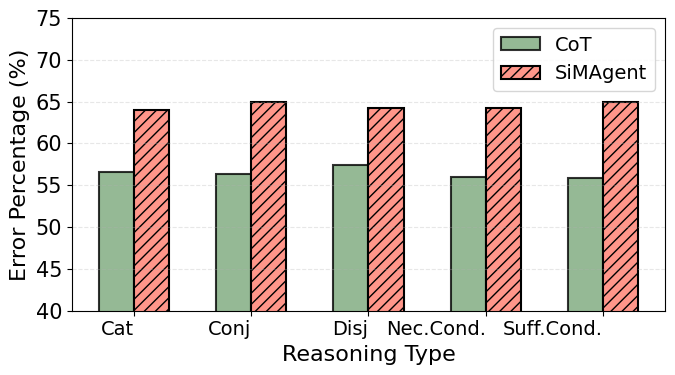

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 최대값 사전 (label: 최대값)
max_values = {
    'Sufficient Conditional Reasoning': 3072,
    'Conjunctive Reasoning': 2755,
    'Categorical Reasoning': 1945,
    'Necessry Condtional Reasoning': 1301,
    'Disjunctive Reasoning': 875
}

# labels, cot_counter, counter 는 이미 정의되어 있다고 가정
labels = sorted(set(cot_counter.keys()) | set(counter.keys()))

# 축약된 레이블 매핑
short_labels = {
    'Sufficient Conditional Reasoning': 'Suff',
    'Conjunctive Reasoning': 'Conj',
    'Categorical Reasoning': 'Cat',
    'Necessry Condtional Reasoning': 'Nec.',
    'Disjunctive Reasoning': 'Disj'
}
shortened_labels = [short_labels[label] for label in labels]

# 퍼센트 값 계산
cot_percents       = [(1-cot_counter.get(label, 0)       / max_values[label]) * 100 for label in labels]
situation_percents = [(1-counter.get(label, 0)           / max_values[label]) * 100 for label in labels]

# 기본 폰트 크기 설정
plt.rcParams.update({'font.size': 15})

# 막대 위치 설정
x = np.arange(len(labels))
width = 0.3

# 색상 지정
cot_color = '#7BA87B'
situation_colors = [
    '#FF968A' if situation_percents[i] >= cot_percents[i] else '#FF968A'
    for i in range(len(labels))
]

# 플롯 생성
plt.figure(figsize=(7, 4))
plt.bar(x - width/2, cot_percents,       width, label='CoT',       color=cot_color, alpha=0.8,  edgecolor='black', linewidth=1.5)
plt.bar(x + width/2, situation_percents, width, label='SiMAgent', color=situation_colors,
        edgecolor='black', linewidth=1.5, alpha=1.0,hatch='///')

# 스타일 설정
plt.ylim(40, 75)
plt.ylabel('Error Percentage (%)', fontsize=16)
plt.xlabel('Reasoning Type',        fontsize=16)
plt.xticks(x, shortened_labels, rotation=0, ha='right', fontsize=14)
# plt.title('Error % by Reasoning Type', fontsize=18)
plt.legend(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


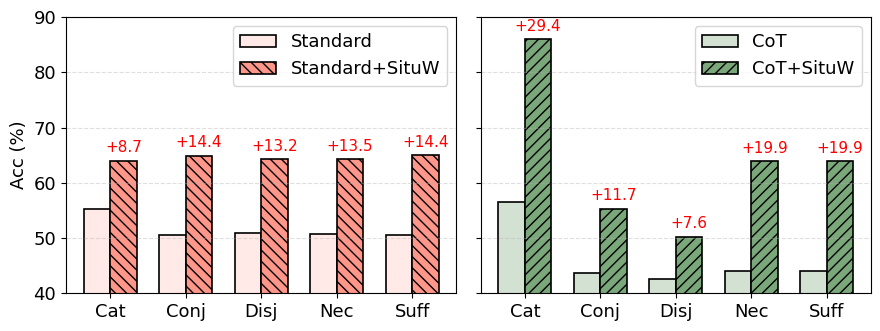

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 정의
reasoning_types = ['Cat', 'Conj', 'Disj', 'Nec', 'Suff']
short_labels = ['Cat', 'Conj', 'Disj', 'Nec', 'Suff']

# Accuracy percentages
standard      = [55.33, 50.49, 50.97, 50.73, 50.52]
standard_ours = [64.01, 64.93, 64.22, 64.25, 64.94]
cot           = [56.6, 43.62, 42.62, 43.96, 44]
cot_ours      = [86, 55.33, 50.26, 63.86, 63.86]

x = np.arange(len(reasoning_types))
width = 0.35

plt.rcParams.update({'font.size': 13})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3.5), sharey=True)

# --- 왼쪽 플롯: Standard 계열 ---
bars1 = ax1.bar(x - width/2, standard,      width, label='Standard',      color='#FFEAE7', edgecolor='black', linewidth=1.2)
bars2 = ax1.bar(x + width/2, standard_ours, width, label='Standard+SituW', color='#FF968A', edgecolor='black', linewidth=1.2, hatch='\\\\\\')
ax1.set_xticks(x)
ax1.set_xticklabels(short_labels, rotation=0)
ax1.set_ylabel("Acc (%)")
ax1.set_ylim(40, 90)
ax1.grid(axis='y', linestyle='--', alpha=0.4)
ax1.legend()

# 정확도 상승분 표기 (Standard)
for i in range(len(standard)):
    diff = standard_ours[i] - standard[i]
    ax1.text(x[i] + width/2, standard_ours[i] + 1, f"+{diff:.1f}", ha='center', va='bottom', color='red', fontsize=11)

# --- 오른쪽 플롯: CoT 계열 ---
bars3 = ax2.bar(x - width/2, cot,      width, label='CoT',      color='#D3E1D3', edgecolor='black', linewidth=1.2)
bars4 = ax2.bar(x + width/2, cot_ours, width, label='CoT+SituW', color='#7BA87B', edgecolor='black', linewidth=1.2, hatch='///')
ax2.set_xticks(x)
ax2.set_xticklabels(short_labels, rotation=0)
ax2.grid(axis='y', linestyle='--', alpha=0.4)
ax2.legend()

# 정확도 상승분 표기 (CoT)
for i in range(len(cot)):
    diff = cot_ours[i] - cot[i]
    ax2.text(x[i] + width/2, cot_ours[i] + 1, f"+{diff:.1f}", ha='center', va='bottom', color='red', fontsize=11)

plt.tight_layout()
plt.show()


Mixed eval

In [ ]:
import json

with open('/data3/KJE/code/WIL_DeepLearningProject_2/NS_Parser/SITUM_EMNLP/outputs/Ours_CoT_logiqa_test_gpt-3.5-turbo_suffle_2.json', 'r') as f :
    mix_our_data = json.load(f) 

with open('/data3/KJE/code/WIL_DeepLearningProject_2/NS_Parser/SITUM_EMNLP/outputs/CoT_logiqa_test_gpt-3.5-turbo_suffle_2.json', 'r') as f :
    mix_cot_dta = json.load(f) 

In [22]:
mix_our_data[0]['predicted_answer']

'A**'

In [23]:
mix_our_data_correct = 0

mix_our_data_fail_case =[]
for d in mix_our_data:
    if d['answer'] == 'entailment':
        gt = 'a'
    else:
        gt = 'b'

    if gt in d['predicted_answer'].lower():
        mix_our_data_correct += 1 
    else:
        mix_our_data_fail_case.append(d)


In [14]:
mix_cot_dta_correct = 0

mix_cot_dta_fail_case =[]
for d in mix_cot_dta:
    # print(d['predicted_answer'])
    if d['answer'] == 'entailment':
        gt = 'a'
    else:
        gt = 'b'

    if gt in d['predicted_answer'].lower():
        mix_cot_dta_correct += 1 
    else:
        mix_cot_dta_fail_case.append(d)

In [24]:
mix_our_data_correct/len(mix_our_data) 

0.5770897832817338

In [20]:
mix_cot_dta_fail_case[0]

{'id': 7609,
 'questtion': "Assuming that three of the four sentences the teacher said are true and one is false, the correct option is 'Left hand fruit candy, right hand toffee'.",
 'original_context': 'Then the teacher said four things:.There are two kinds of fruit candy and toffee in the jar.The kindergarten teacher put his hands into the jar, and then clenched his fists to take out a piece of candies.4. Both the left hand and the right hand are fruit candies.3. If the left hand is fruit candies, then the right hand is not fruit candies.2. Or the left hand is fruit candies, or fruit candies on the right hand.1. The right hand is definitely not fruit candy.',
 'reasoning': '**Final Answer: B**',
 'predicted_answer': 'B**',
 'answer': 'entailment',
 'predicted_choice': 'No final answer found in the text.',
 'time_cost': 2.2959978580474854}

In [18]:
import tqdm
our_mixed_failcase_answer = []
for d in tqdm(mix_cot_dta_fail_case):
    id = d['id']
    for ans in answer_file:
        cot_id = ans['id']
        if id == cot_id and d['questtion'] == ans['hypothesis']:
            our_mixed_failcase_answer.append(ans)
            break

TypeError: 'module' object is not callable